### **Introdução**

*Imagine uma ferramenta que possa auxiliar na triagem inicial de doenças com base nos sintomas apresentados por um paciente. A previsão de doenças usando inteligência artificial é uma abordagem que visa apoiar profissionais de saúde na identificação precoce de possíveis diagnósticos, facilitando o atendimento e contribuindo para um tratamento mais rápido e eficaz.*

Neste projeto, nosso objetivo é desenvolver um modelo de **deep learning** que, a partir dos sintomas relatados, forneça uma previsão precisa do diagnóstico. Para isso, utilizamos a biblioteca **AutoGluon**, que nos permite criar e otimizar modelos de classificação com alta eficiência e rapidez. Esse modelo será integrado a uma interface interativa para permitir que o usuário selecione sintomas e receba previsões instantâneas.

### **Objetivo do Projeto**

O objetivo principal deste projeto é construir uma aplicação capaz de prever doenças com base em sintomas fornecidos pelo usuário, com alta precisão. Nossa meta é criar um modelo robusto que possa generalizar bem para diferentes casos e auxiliar na tomada de decisões.

### **Fonte dos Dados**

Para alimentar e treinar nosso modelo, utilizamos o dataset público disponível no Kaggle, intitulado ["Disease Prediction Dataset"](https://www.kaggle.com/datasets/marslinoedward/disease-prediction-data). Esse dataset contém uma lista extensa de sintomas e os diagnósticos associados, o que permite que nosso modelo aprenda a relacionar diferentes combinações de sintomas a doenças específicas.



# Coleta e Carregamento dos Dados

### **Coleta e Carregamento dos Dados**

*Para construir um modelo de previsão de doenças com base em sintomas, é fundamental começar com uma base de dados sólida e confiável que nos permita treinar o modelo de forma adequada. Aqui, utilizamos o dataset 'Disease Prediction Dataset' do Kaggle, que contém uma variedade de sintomas e os diagnósticos associados, formando a base do nosso modelo de aprendizado de máquina.*

### Acessando e Baixando o Dataset:



In [ ]:
import kagglehub

path = kagglehub.dataset_download("marslinoedward/disease-prediction-data")
print("Path to dataset files:", path)


100%|██████████| 29.8k/29.8k [00:00<00:00, 34.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1


Para iniciar, utilizamos o `kagglehub` para baixar o dataset diretamente da plataforma Kaggle. Esse passo nos permite automatizar a coleta de dados e garantir que estamos trabalhando com as versões mais recentes do dataset.

#### Carregando os Dados de Treinamento e Teste

Uma vez baixado, definimos o caminho para os arquivos de treinamento e teste. Dividimos os dados em dois conjuntos: um para treinar o modelo e outro para avaliar seu desempenho. Essa separação é essencial para que o modelo aprenda a identificar padrões, mas também seja testado em dados que não viu antes, simulando casos reais.

In [ ]:
import pandas as pd

# Definindo o caminho para os arquivos CSV
train_path = "/root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1/Training.csv"
test_path = "/root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1/Testing.csv"

# Carregando os dados de treinamento e teste
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Exibindo as primeiras linhas dos dados
print("Dados de Treinamento:")
print(df_train.head())

print("\nDados de Teste:")
print(df_test.head())



Dados de Treinamento:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling 

Com os caminhos definidos, carregamos os dados em DataFrames usando o `pandas`, o que facilita a visualização e manipulação dos dados. Exibimos as primeiras linhas para garantir que os dados foram carregados corretamente e já começamos a observar o formato das informações que alimentam nosso modelo. Esse dataset será a base para o modelo aprender e prever diagnósticos com base nos sintomas fornecidos.


### **Análise Inicial das Classes no Dataset de Treinamento**

*Nessa etapa, quero ter uma visão completa das classes (diagnósticos) presentes no dataset de treinamento para garantir que o modelo reconheça e preveja todas as doenças disponíveis.*


In [ ]:
import pandas as pd

# Carregando
train_path = "/root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1/Training.csv"

# Carregando o arquivo de treinamento para inspecionar as classes
training_data = pd.read_csv(train_path)

# Nome da coluna de rótulos
label_column = 'prognosis'

# Exibir valores únicos da coluna de rótulos para verificar o mapeamento das classes
unique_labels = training_data[label_column].unique()

# Exibir todas as classes e seus índices
for index, label in enumerate(unique_labels):
    print(f"Classe {index}: {label}")

Classe 0: Fungal infection
Classe 1: Allergy
Classe 2: GERD
Classe 3: Chronic cholestasis
Classe 4: Drug Reaction
Classe 5: Peptic ulcer diseae
Classe 6: AIDS
Classe 7: Diabetes 
Classe 8: Gastroenteritis
Classe 9: Bronchial Asthma
Classe 10: Hypertension 
Classe 11: Migraine
Classe 12: Cervical spondylosis
Classe 13: Paralysis (brain hemorrhage)
Classe 14: Jaundice
Classe 15: Malaria
Classe 16: Chicken pox
Classe 17: Dengue
Classe 18: Typhoid
Classe 19: hepatitis A
Classe 20: Hepatitis B
Classe 21: Hepatitis C
Classe 22: Hepatitis D
Classe 23: Hepatitis E
Classe 24: Alcoholic hepatitis
Classe 25: Tuberculosis
Classe 26: Common Cold
Classe 27: Pneumonia
Classe 28: Dimorphic hemmorhoids(piles)
Classe 29: Heart attack
Classe 30: Varicose veins
Classe 31: Hypothyroidism
Classe 32: Hyperthyroidism
Classe 33: Hypoglycemia
Classe 34: Osteoarthristis
Classe 35: Arthritis
Classe 36: (vertigo) Paroymsal  Positional Vertigo
Classe 37: Acne
Classe 38: Urinary tract infection
Classe 39: Psoriasis


Finalmente, exibo cada classe (doença) junto com seu índice numérico. Esse mapeamento me permite visualizar claramente como cada doença será representada no modelo, além de garantir que todas as classes esperadas estão presentes.
Essa análise inicial das classes oferece uma visão completa das categorias de diagnóstico, preparando o terreno para que o modelo interprete corretamente as diferentes doenças no treinamento e nas previsões.

### **Tratamento e Limpeza dos Dados**

*Para que o modelo de previsão seja eficaz e confiável, é essencial garantir que os dados estejam bem estruturados, sem valores indesejados ou inconsistências que possam comprometer o processo de aprendizado. Nesta etapa, realizamos uma série de tratamentos e verificações para assegurar a qualidade dos dados.*

### Remoção de Colunas Indesejadas e Verificação de Valores Ausentes

Nosso primeiro passo na limpeza dos dados é remover qualquer coluna que seja irrelevante para o modelo. Aqui, a coluna `Unnamed: 133` aparece como indesejada e é removida do dataset de treinamento para manter os dados organizados e prontos para o modelo.

Além disso, verificamos se há valores ausentes nos datasets de treinamento e teste. Qualquer valor ausente poderia comprometer o aprendizado do modelo, então essa verificação é fundamental.



In [ ]:
df_train = df_train.loc[:, ~df_train.columns.str.contains('^Unnamed')]

missing_train = df_train.isnull().sum().sum()
missing_test = df_test.isnull().sum().sum()

print(f"Valores ausentes no dataset de treinamento: {missing_train}")
print(f"Valores ausentes no dataset de teste: {missing_test}")


Valores ausentes no dataset de treinamento: 0
Valores ausentes no dataset de teste: 0


Começamos o processo de limpeza removendo a coluna `Unnamed: 133`, que não acrescenta informação útil ao nosso modelo. Em seguida, verificamos a presença de valores ausentes em ambos os conjuntos de dados, e felizmente, nenhum valor ausente foi encontrado. Isso nos permite prosseguir com segurança para as próximas etapas de tratamento.


### Remoção de Linhas Duplicadas
Duplicatas nos dados de treinamento podem fazer com que o modelo 'aprenda' de forma enviesada, resultando em um modelo que não generaliza bem para novos dados. Aqui, verificamos a quantidade de duplicatas e removemos essas linhas indesejadas no dataset de treinamento.



In [ ]:
duplicated_train = df_train.duplicated().sum()
duplicated_test = df_test.duplicated().sum()

print(f"Número de duplicatas no dataset de treinamento: {duplicated_train}")
print(f"Número de duplicatas no dataset de teste: {duplicated_test}")


Número de duplicatas no dataset de treinamento: 4616
Número de duplicatas no dataset de teste: 0


In [ ]:
# Remover duplicatas
df_train = df_train.drop_duplicates()

print(f"Número de linhas no dataset de treinamento após remoção de duplicatas: {df_train.shape[0]}")


Número de linhas no dataset de treinamento após remoção de duplicatas: 304


Identificamos 4.616 linhas duplicadas no dataset de treinamento, que são removidas para garantir que o modelo não seja influenciado por dados repetidos. O dataset de teste, por outro lado, não apresenta duplicatas, o que facilita a avaliação da performance do modelo em dados inéditos.

### Verificação dos Tipos de Dados

Para assegurar que todos os dados estejam no formato adequado, verificamos os tipos das colunas. Cada sintoma e variável deve estar representado no tipo correto para que o modelo interprete as informações de maneira eficaz.


In [ ]:
# Checar tipos de dados
print(df_train.dtypes.value_counts())


int64     132
object      1
Name: count, dtype: int64


Por fim, verifiquei os tipos de dados em todas as colunas. As colunas numéricas estão devidamente configuradas como inteiros (`int64`), enquanto a coluna de diagnóstico está no formato `object`, garantindo que os dados estão prontos para o próximo passo: a análise e a modelagem.

### **Exploração dos Dados**

*Com os dados devidamente limpos, partimos para uma análise exploratória. Nesta etapa, queremos entender a distribuição das classes e verificar possíveis desequilíbrios, além de explorar os valores nas colunas de sintomas. Isso nos ajuda a tomar decisões sobre o tratamento adicional dos dados e, posteriormente, a configuração do modelo.*

### Verificação do Balanceamento das Classes

O primeiro ponto na exploração dos dados é verificar o balanceamento das classes na coluna de diagnóstico, `prognosis`. Classes com menos exemplos podem gerar um modelo tendencioso, que aprenda mais sobre as doenças com maior representação e menos sobre as doenças com menor frequência. Esse desbalanceamento pode impactar a precisão e generalização do modelo.


In [ ]:
class_distribution = df_train['prognosis'].value_counts()
print("Distribuição das classes (doenças):")
print(class_distribution)


Distribuição das classes (doenças):
prognosis
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                   

Quero garantir que todas as doenças tenham uma representação justa no modelo. Aqui, verifiquei a quantidade de ocorrências de cada diagnóstico para entender o balanceamento das classes no dataset. Observamos que algumas doenças, como **Hepatitis D** e **Dengue**, possuem 10 exemplos, enquanto outras, como **Fungal infection** e **Heart attack**, têm apenas 5. Esse desbalanceamento pode ser uma área de atenção no treinamento do modelo.


### Visualização da Distribuição das Classes

Para entender melhor essa distribuição, utilizei um gráfico de barras que exibe a quantidade de exemplos para cada doença. A visualização ajuda a identificar visualmente quais classes estão sub ou sobre-representadas.

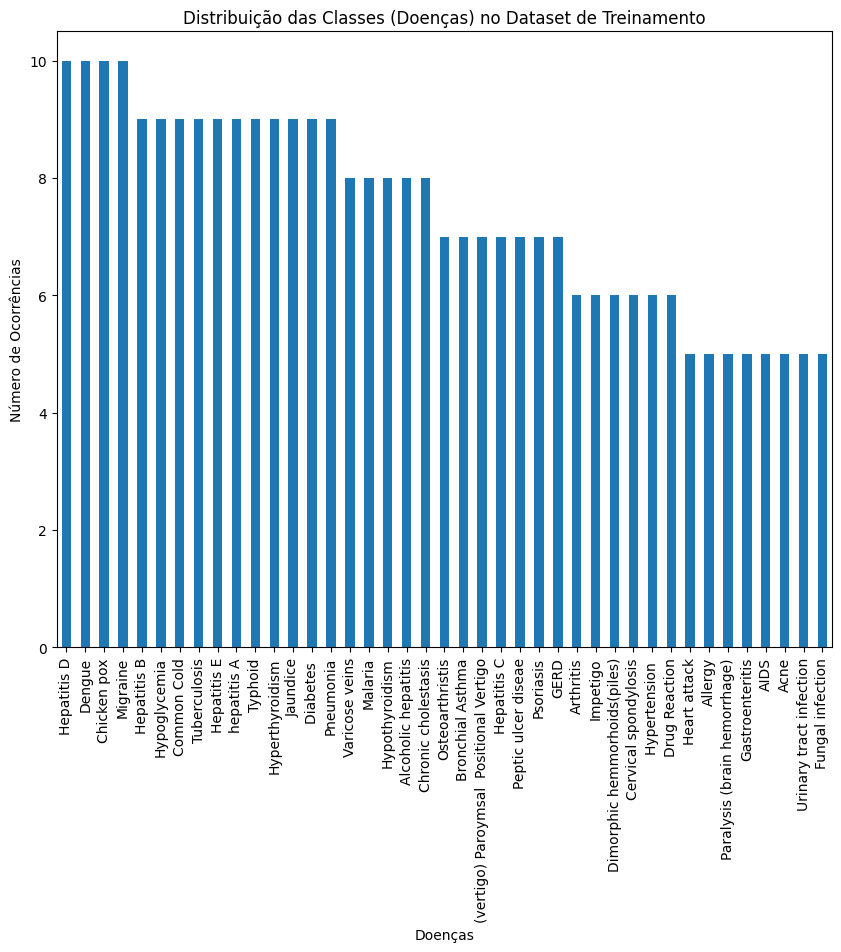

In [ ]:
import matplotlib.pyplot as plt

# Plot da distribuição das classes (doenças)
plt.figure(figsize=(10, 8))
class_distribution.plot(kind='bar')
plt.title("Distribuição das Classes (Doenças) no Dataset de Treinamento")
plt.xlabel("Doenças")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=90)
plt.show()


Para complementar a análise de distribuição, gerei um gráfico de barras que mostra a quantidade de ocorrências de cada doença no dataset de treinamento. Isso nos dá uma visão rápida dos possíveis desequilíbrios de classes, auxiliando na preparação para o treinamento do modelo.

### Verificação de Valores Únicos nas Colunas de Sintomas

Cada coluna de sintomas é composta por valores binários (0 ou 1), indicando a ausência ou presença de um sintoma específico para cada exemplo. Nesta etapa, verificamos se os valores únicos em cada coluna estão no formato esperado.




In [ ]:
unique_values = df_train.drop(columns=['prognosis']).apply(lambda col: col.unique())
print("Valores únicos em cada coluna de sintomas:")
print(unique_values)


Valores únicos em cada coluna de sintomas:
itching                 [1, 0]
skin_rash               [1, 0]
nodal_skin_eruptions    [1, 0]
continuous_sneezing     [0, 1]
shivering               [0, 1]
                         ...  
small_dents_in_nails    [0, 1]
inflammatory_nails      [0, 1]
blister                 [0, 1]
red_sore_around_nose    [0, 1]
yellow_crust_ooze       [0, 1]
Length: 132, dtype: object


Para garantir que as informações estejam consistentes, verifiquei os valores únicos em cada coluna de sintomas. Observamos que todas as colunas apresentam apenas os valores 0 e 1, indicando que estão prontas para serem utilizadas pelo modelo sem necessidade de tratamentos adicionais. Esse passo assegura que nossos dados de sintomas estão corretamente formatados para a fase de modelagem.



### **Pré-processamento dos Dados**

*Agora que entendemos a estrutura e o balanceamento do nosso dataset, precisamos realizar algumas transformações para que os dados estejam prontos para serem usados pelo modelo. Essa fase envolve a conversão dos dados de saída para valores numéricos e a separação das variáveis entre entradas e saída (target).*

### Codificação da Coluna `prognosis`

Para que o modelo interprete corretamente os diagnósticos, transformei as classes de doenças (que estão em formato de texto) em valores numéricos usando o `LabelEncoder`. Essa etapa é essencial para que o algoritmo de aprendizado de máquina consiga lidar com as diferentes classes de saída de forma eficiente.

Em seguida, separei as variáveis de entrada (sintomas) e a variável de saída (diagnóstico) nos datasets de treinamento e teste. Essa estrutura é necessária para que o modelo saiba o que usar como base para suas previsões e o que tentar prever.





In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Codificação da coluna 'prognosis' (Label Encoding)
label_encoder = LabelEncoder()
df_train['prognosis'] = label_encoder.fit_transform(df_train['prognosis'])
df_test['prognosis'] = label_encoder.transform(df_test['prognosis'])

# 2. Separação entre Features (X) e Labels (y) nos datasets de treinamento e teste
X_train = df_train.drop(columns=['prognosis'])
y_train = df_train['prognosis']

X_test = df_test.drop(columns=['prognosis'])
y_test = df_test['prognosis']

# Exibir classes codificadas para referência
print("Classes codificadas:", label_encoder.classes_)


Classes codificadas: ['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


Transformei a coluna `prognosis` em valores numéricos, atribuindo um código único para cada doença. Isso permite que o modelo interprete as diferentes classes de forma mais eficiente e consistente. Também salvamos essa codificação, para que, ao final, possamos interpretar as previsões feitas pelo modelo. Aqui, dividir os dados em variáveis de entrada (`X_train` e `X_test`), compostas pelos sintomas, e variáveis de saída (`y_train` e `y_test`), compostas pelos diagnósticos. Essa separação garante que o modelo tenha uma clara distinção entre o que ele deve aprender e o que ele deve prever.



### **Treinamento do Modelo com AutoGluon**

*Com os dados preparados, passamos agora para o treinamento do modelo usando a biblioteca **AutoGluon**. Optamos pelo **TabularPredictor**, que é ideal para problemas de classificação multiclasse, como a previsão de doenças com base em sintomas.*

### Configuração do AutoGluon para Classificação

Ao configurar o AutoGluon, definir o tipo de problema como `multiclass`, indicando que estamos lidando com várias classes de saída (diferentes doenças). Utilizei também o `eval_metric='accuracy'` para que o modelo priorize a precisão nas previsões, o que é fundamental para garantir diagnósticos corretos.


In [4]:
!pip install cmake


   ---------------------------------------- 0.0/35.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/35.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/35.6 MB 5.0 MB/s eta 0:00:07
   ------ --------------------------------- 6.0/35.6 MB 14.8 MB/s eta 0:00:03
   ---------- ----------------------------- 9.2/35.6 MB 18.4 MB/s eta 0:00:02
   -------------- ------------------------- 13.1/35.6 MB 16.1 MB/s eta 0:00:02
   ------------------- -------------------- 17.6/35.6 MB 17.0 MB/s eta 0:00:02
   ------------------------- -------------- 22.8/35.6 MB 18.7 MB/s eta 0:00:01
   --------------------------- ------------ 24.4/35.6 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:0

In [6]:
!pip install onnx==1.8.1


     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ------ --------------------------------- 0.8/5.2 MB 4.8 MB/s eta 0:00:01
     ------------------------ --------------- 3.1/5.2 MB 9.2 MB/s eta 0:00:01
     ---------------------------------------- 5.2/5.2 MB 11.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build onnx


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [89 lines of output]
  <string>:32: DeprecationWarning: Use shutil.which instead of find_executable
  <string>:33: DeprecationWarning: Use shutil.which instead of find_executable
  fatal: not a git repository (or any of the parent directories): .git
  C:\Users\User\AppData\Local\Temp\pip-build-env-aruuskh8\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
    warnings.warn(msg)
  C:\Users\User\AppData\Local\Temp\pip-build-env-aruuskh8\overlay\Lib\site-packages\setuptools\dist.py:495: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'license-file' will not be supported in future
          versions. Please use the underscore name 'license_file' instead.
  
          By 2025-Mar-03, you need to update your project and 

In [2]:
!pip install autogluon


  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.4.0-1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached omegaconf-2.2.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached nvidia-ml-py3-7.352.0.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached fastai-2.7.18-py3-none-any.whl.metadata (9.1 kB)
  Using cached gluonts-0.15.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached optimum-1.18.1-py3-none-any.whl.metadata (18 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.7.19-py3-none-any.whl.metadata (3.5 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached spacy-3.8.2-cp310-cp310-win_amd64.whl.metadata (27 kB)
  Using cached coloredlog

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [11 lines of output]
  C:\Users\User\AppData\Local\Temp\pip-install-wodn5qkx\onnx_d4ad8dd5facb4526bd67400774e6a002\setup.py:36: DeprecationWarning: Use shutil.which instead of find_executable
    CMAKE = find_executable('cmake3') or find_executable('cmake')
  C:\Users\User\AppData\Local\Temp\pip-install-wodn5qkx\onnx_d4ad8dd5facb4526bd67400774e6a002\setup.py:37: DeprecationWarning: Use shutil.which instead of find_executable
    MAKE = find_executable('make')
  fatal: not a git repository (or any of the parent directories): .git
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\User\AppData\Local\Temp\pip-install-wodn5qkx\onnx_d4ad8dd5facb4526bd67400774e6a002\setup.py", line 86, in <module>
      assert CMAKE, 'Could not find "cmake" executable!'
  AssertionError: Could n

Configurar o AutoGluon com o tipo de problema `multiclass` permite que ele entenda que estamos lidando com várias doenças diferentes, e a métrica de avaliação de precisão (`accuracy`) ajuda o modelo a buscar o maior número possível de acertos.

# Treinamento do Modelo

Definir os parâmetros `presets='best_quality'` e `hyperparameters={'FASTAI': {}}`, que configuram o AutoGluon para focar na qualidade e utilizam especificamente o modelo de rede neural com o framework **FastAI**. Essa escolha permite usar um modelo robusto que processa dados tabulares de maneira eficiente.

Escolhir treinar uma rede neural com o framework FastAI, pois ele é eficaz para lidar com dados tabulares e possui um bom desempenho em problemas de classificação multiclasse. Ao focarmos na 'melhor qualidade', estamos priorizando que o modelo aprenda com profundidade, otimizando seus parâmetros ao máximo.

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

# Certificar que os dados estão no formato TabularDataset
train_data = TabularDataset(df_train)
test_data = TabularDataset(df_test)

# Treinamento do modelo com AutoGluon, usando especificamente o modelo de rede neural FastAI
predictor = TabularPredictor(label='prognosis', problem_type='multiclass', eval_metric='accuracy').fit(
    train_data=train_data,
    time_limit=600,
    presets='best_quality',
    hyperparameters={'FASTAI': {}}  # Força o AutoGluon a usar apenas o modelo de rede neural FastAI
)

# Avaliação do modelo
performance = predictor.evaluate(test_data)
print("Desempenho do modelo:", performance)




No path specified. Models will be saved in: "AutogluonModels/ag-20241102_150955"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.98 GB / 12.67 GB (86.6%)
Disk Space Avail:   66.11 GB / 107.72 GB (61.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

Desempenho do modelo: {'accuracy': 0.9761904761904762, 'balanced_accuracy': 0.9878048780487805, 'mcc': 0.9761627906976744}


### Avaliação do Modelo

Após o treinamento, utilizei o dataset de teste para avaliar a performance do modelo em novos dados. O desempenho é mensurado em termos de precisão, acurácia balanceada e MCC (coeficiente de correlação de Matthews), métricas que indicam se o modelo está fazendo previsões consistentes e confiáveis.
Testei o modelo com um conjunto de dados não visto anteriormente (dados de teste) para entender sua precisão e capacidade de generalização. Os resultados indicam que o modelo está alcançando uma excelente precisão de quase 98%, mostrando que ele é capaz de identificar padrões e realizar previsões de forma confiável.

### **Validação do Modelo**

*Após treinar o modelo, é fundamental verificar como ele se comporta com dados que não foram utilizados no treinamento. Assim, posso avaliar sua capacidade de generalização e identificar possíveis melhorias.*

Utilizo o modelo treinado para prever os diagnósticos no conjunto de teste. Isso me permite comparar as previsões com os valores reais e avaliar a performance do modelo.

Relatório de Classificação:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1

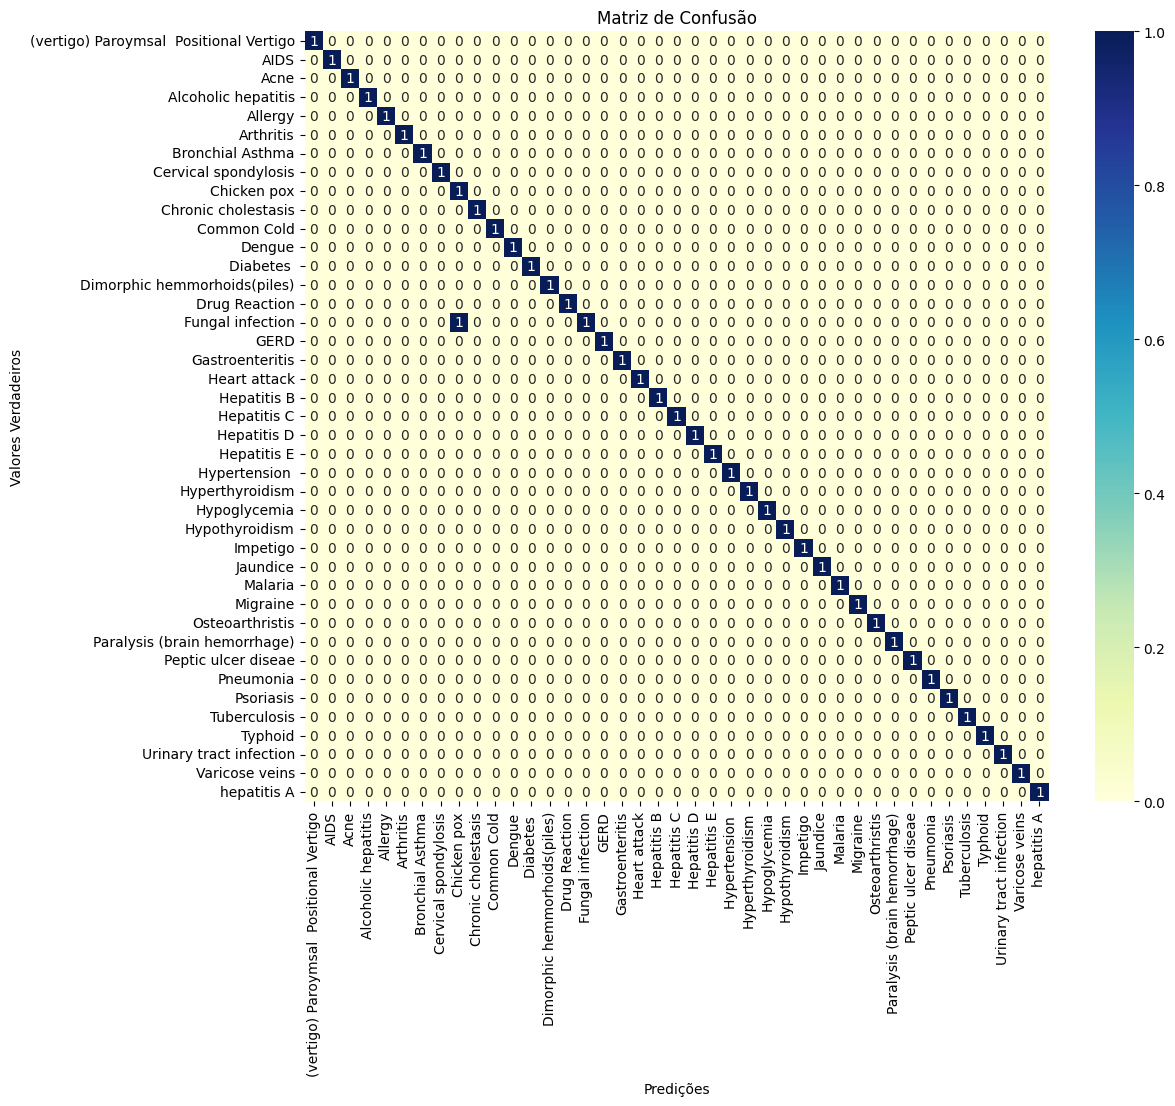

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fazer previsões no conjunto de teste
y_pred = predictor.predict(X_test)

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_), annot=True, fmt='g', cmap="YlGnBu")
plt.title("Matriz de Confusão")
plt.xlabel("Predições")
plt.ylabel("Valores Verdadeiros")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()





### Relatório de Classificação

O relatório de classificação me fornece informações sobre precisão, recall e f1-score para cada doença. Dessa forma, posso identificar quais classes o modelo está prevendo bem e quais precisam de atenção.

### Matriz de Confusão


A matriz de confusão me permite visualizar onde o modelo está acertando ou errando nas previsões. Cada célula mostra o número de previsões corretas ou incorretas entre as classes reais e previstas.

Observando o relatório, percebo que o modelo tem um desempenho excelente na maioria das classes, com precisão e recall de 1.00 para quase todas as doenças. No entanto, notei que para 'Chicken pox' e 'Fungal infection', o f1-score é um pouco menor, indicando que o modelo teve algumas dificuldades nessas classes. Isso pode ser devido ao número reduzido de exemplos ou à similaridade de sintomas com outras doenças.





# Salvando o Modelo e o LabelEncoder

Salvar o modelo e o `LabelEncoder` é crucial para que possa carregar e usar o modelo posteriormente, especialmente na aplicação web. Isso garante que o mapeamento das classes permaneça consistente entre o treinamento e a implementação.





In [ ]:
import joblib

# Salvando o LabelEncoder
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [ ]:
# Salvando o Modelo treinado
model_path = 'AutogluonModels/ModeloFixo'
predictor.save(model_path)


### **Implementação do Modelo em um Website**

*Agora que o modelo foi treinado e validado, quero torná-lo acessível através de uma interface web. Utilizando o **Streamlit**, consigo criar um ambiente interativo onde usuários podem inserir sintomas e receber previsões do modelo de forma fácil e prática.*




### Configurando o Ambiente para Streamlit

Começo instalando as bibliotecas necessárias, incluindo o **Streamlit**, que será a base da aplicação, e o **pyngrok**, que me permite tornar o site acessível temporariamente pela web para testes locais.



In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.6 MB/s eta 0:00:00


Instalo as bibliotecas e dependências para criar uma interface web e facilitar o acesso ao modelo. Com o `pyngrok`, consigo expor a aplicação diretamente, testando o acesso e o fluxo do usuário de forma prática e segura.

### Verificação de Arquivos e Estrutura de Diretórios

Antes de prosseguir com a implementação, verifico se o modelo e todos os arquivos auxiliares (como o `LabelEncoder`) estão no local correto. Isso é crucial para garantir que o site consiga acessar o modelo e retornar previsões.


In [ ]:
import os

# Listar arquivos no diretório atual
print(os.listdir("."))


['.config', 'label_encoder.joblib', 'AutogluonModels', 'sample_data']


In [ ]:
# Listar conteúdo da pasta AutogluonModels para encontrar o subdiretório do modelo
print(os.listdir("AutogluonModels"))


['ag-20241102_150955']


In [ ]:
# Listar conteúdo dentro da pasta específica do modelo
print(os.listdir("AutogluonModels/ag-20241102_150955"))


['learner.pkl', 'utils', 'metadata.json', 'predictor.pkl', 'version.txt', 'models']


Verifico a estrutura do diretório para ter certeza de que todos os arquivos estão organizados e que o modelo salvo pelo AutoGluon está acessível. Confiro as pastas e subpastas para evitar problemas de acesso e carregamento durante a execução da aplicação.

### **Implementação do Site Interativo com Streamlit**

*Agora que o modelo e o `LabelEncoder` estão prontos, é hora de criar a interface web interativa. Com **Streamlit**, consigo configurar um ambiente amigável, onde o usuário pode selecionar sintomas e receber uma previsão do diagnóstico em tempo real.*

### Configurando a Interface Web no Streamlit

Primeiro, configuro o arquivo `app.py` para estruturar a interface. Iniciando com o título e a descrição, a aplicação guia o usuário a selecionar os sintomas que ele apresenta, possibilitando a previsão.
Carrego o modelo salvo e o `LabelEncoder`, que permite decodificar a previsão do modelo para o nome da doença. Ao clicar em 'Prever', o Streamlit processa os sintomas selecionados e passa as informações para o modelo.


In [ ]:
%%writefile app.py

import streamlit as st

# Configurando o layout da página
st.set_page_config(page_title="Previsão de Doenças com AutoGluon", page_icon="🩺", layout="wide")

import pandas as pd
from autogluon.tabular import TabularPredictor
import joblib
from PIL import Image
import base64

# Função para adicionar imagem de fundo
def add_bg_from_local(image_file):
    with open(image_file, "rb") as image:
        encoded = base64.b64encode(image.read()).decode()
    st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url(data:image/png;base64,{encoded});
            background-size: cover;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )

# Adicionando imagem de fundo
add_bg_from_local('/content/cena-de-saude-2_173691-553.avif')  # Certifique-se de ter essa imagem na pasta do projeto

# Carregando o modelo
model_path = 'AutogluonModels/ag-20241102_150955'
predictor = TabularPredictor.load(model_path)

# Carregar o LabelEncoder
label_encoder = joblib.load('label_encoder.joblib')

# Cabeçalho do aplicativo com título e subtítulo
st.title("🩺 Previsão de Doenças com AutoGluon")
st.markdown("**Descubra possíveis diagnósticos com base nos sintomas apresentados de forma rápida e precisa.**")
st.markdown("---")

# Seção de instruções
st.markdown(
    "<div style='background-color: #f9f9f9; padding: 15px; border-radius: 10px;'>"
    "<h4 style='text-align: center; color: #333;'>Preencha os sintomas apresentados pelo paciente e clique em Prever.</h4>"
    "</div>",
    unsafe_allow_html=True
)

# Lista de sintomas
sintomas = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills',
    'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting',
    'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
    'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
    'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
    'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin',
    'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
    'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
    'acute_liver_failure', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
    'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'chest_pain', 'weakness_in_limbs',
    'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
    'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs',
    'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',
    'swollen_extremities', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips',
    'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck',
    'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance',
    'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort',
    'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
    'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium',
    'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches',
    'watering_from_eyes', 'increased_appetite', 'family_history', 'mucoid_sputum', 'rusty_sputum',
    'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'coma',
    'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',
    'prominent_veins_on_calf', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
    'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',
    'red_sore_around_nose', 'yellow_crust_ooze'
]

# Seleção de sintomas
sintomas_selecionados = st.multiselect("Escolha os sintomas apresentados:", options=sintomas)

# Inicializando a variável previsao_significado como None
previsao_significado = None

# Botão de previsão
if st.button("Prever", help="Clique para realizar a previsão baseada nos sintomas selecionados"):
    dados_usuario = pd.DataFrame([{sintoma: 1 if sintoma in sintomas_selecionados else 0 for sintoma in sintomas}])

# fazendo previsão
    previsao = predictor.predict(dados_usuario)[0]
    previsao_significado = label_encoder.inverse_transform([previsao])[0]

# Exibindo o resultado
if previsao_significado is not None:
    st.markdown(
        f"""
        <div style="background-color: #dff9fb; padding: 20px; border-radius: 10px; text-align: center; margin-top: 20px;">
            <h2 style="color: #130f40; font-weight: bold;">Previsão: {previsao_significado}</h2>
        </div>
        """,
        unsafe_allow_html=True
    )
    st.balloons()

# Rodapé
st.markdown("---")
st.markdown(
    "<div style='text-align: center; color: #555;'>"
    "Desenvolvido com 💖 por Paulo Eduardo, Cientista de Dados e Engenheiro de Machine Learning</div>",
    unsafe_allow_html=True
)


Overwriting app.py


No `app.py`, configuro a base da interface com um título descritivo e instruções para orientar o usuário. Adicionei todas as opções de sintomas como caixas de seleção para facilitar a entrada de dados e assegurar que a estrutura dos sintomas está consistente com o que o modelo espera.

Para garantir que a previsão seja precisa, carrego o modelo treinado e o `LabelEncoder`. Quando o usuário seleciona os sintomas e clica no botão de previsão, a aplicação processa esses dados e exibe o diagnóstico previsto. A decodificação do `LabelEncoder` assegura que o nome da doença seja exibido de forma clara e compreensível.

### Configuração para Acesso Remoto com Ngrok

Para tornar o aplicativo acessível remotamente, uso o **Ngrok**, que cria uma URL pública temporária. Assim, posso compartilhar o link e testar o aplicativo de qualquer dispositivo com acesso à internet, sem a necessidade de configuração avançada de rede.

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2o7i0e0EKmU3oj4zVbtm6Xjn7jR_7hf6XsGPio1vEu77pTLKf")

Com o `pyngrok`, torno a aplicação acessível online, criando uma URL pública que posso usar para teste e compartilhamento. Essa configuração permite que o site seja facilmente acessado, promovendo uma experiência de uso mais ampla e prática.

### Testando e Visualizando a Previsão

Quando a aplicação está em execução, o usuário interage com a interface selecionando sintomas e visualizando o resultado da previsão. A aplicação utiliza o modelo treinado para realizar a previsão em tempo real, exibindo a doença mais provável.


In [ ]:
# Executando o aplicativo Streamlit (app.py) em um servidor local
!streamlit run app.py --server.port 8501 &



2024-11-02 19:55:34.310 Port 8501 is already in use


In [ ]:
# Encerrando qualquer túnel Ngrok ativo
ngrok.kill()


In [ ]:
# Criando um túnel público
public_url = ngrok.connect(8501)
print(f"URL pública para o aplicativo Streamlit: {public_url}")

URL pública para o aplicativo Streamlit: NgrokTunnel: "https://bee1-34-169-32-13.ngrok-free.app" -> "http://localhost:8501"


Agora, com o site em funcionamento, o usuário pode interagir com o modelo, inserindo sintomas e recebendo uma resposta em tempo real. Essa interface é intuitiva e rápida, permitindo que qualquer pessoa simule uma previsão de diagnóstico.

In [ ]:
# Executando o aplicativo Streamlit (app.py) em segundo plano, ignorando a saída do terminal
!streamlit run app.py &> /dev/null &




### Finalizando a Implementação

*Com o Streamlit e o Ngrok configurados, o aplicativo web está completo e pronto para ser usado e compartilhado. Agora, tenho uma ferramenta funcional e interativa que fornece previsões de doenças com base nos sintomas.*

### **Conclusão do Projeto**

Esse projeto foi um exercício abrangente no desenvolvimento de uma aplicação de machine learning que prevê diagnósticos com base em sintomas, passando por todas as etapas desde a coleta de dados até a implementação de uma interface interativa.

Começamos coletando e limpando os dados para garantir sua integridade e consistência. Com um dataset bem estruturado, aplicamos técnicas de pré-processamento, como a codificação das classes, e exploramos a distribuição das classes para entender possíveis desbalanceamentos. A partir disso, treinamos um modelo com o **AutoGluon**, focado em maximizar a precisão e generalização para uma ampla variedade de doenças. A validação do modelo mostrou resultados sólidos, com métricas de desempenho elevadas para a maioria das classes, o que nos deu confiança para a etapa de implementação.

A aplicação foi desenvolvida com **Streamlit**, proporcionando uma interface prática e acessível, onde os usuários podem selecionar sintomas e obter uma previsão em tempo real. Além disso, configuramos o **Ngrok** para permitir o acesso remoto e a visualização externa da aplicação, tornando-a acessível a diferentes usuários e dispositivos.

Este projeto demonstrou a eficácia do uso de aprendizado de máquina para aplicações na área da saúde, mostrando como um modelo preditivo pode auxiliar na triagem inicial e identificação de possíveis doenças. Com aprimoramentos futuros, como a inclusão de mais dados e técnicas para lidar com classes desbalanceadas, a aplicação pode se tornar ainda mais precisa e robusta.

Esse projeto é uma demonstração de como dados e inteligência artificial podem ser transformados em ferramentas práticas, oferecendo uma solução acessível e inovadora para o diagnóstico assistido.